In [1]:
# code in waterwaves.wave
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root

from waterwaves.start import linear # these are relativized in package
from waterwaves.display import eta,Ej,extract,QR
from waterwaves.grids import grids
from waterwaves.boundary import F
from waterwaves.parameters import Hmx_d,Hmx_0,d_L,Hmx_L
from waterwaves.wave import wave,wave_base

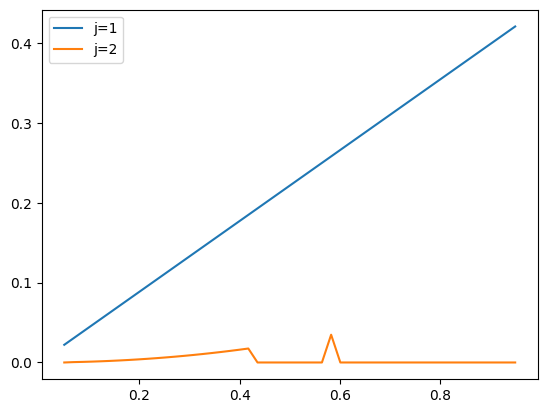

In [2]:
Nc=2 # number of dominant components
H=np.linspace(0.05,0.95)
SOL=wave_base(Nc,H)
L_d=0
Ej(H,SOL)
plt.legend()
plt.show()

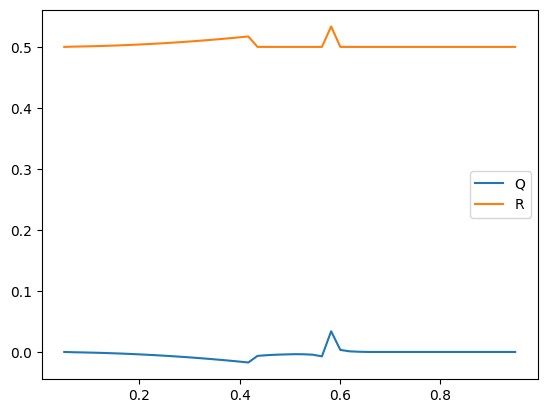

In [3]:
QR(H,SOL)
plt.legend()
plt.show()

In [4]:
Hp=np.linspace(0.1,0.3,4)
BASE=wave_base(Nc,Hp)
extract(BASE,'success')

[True, True, True, True]

In [5]:
from scipy.interpolate import make_interp_spline as mis

fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,2))

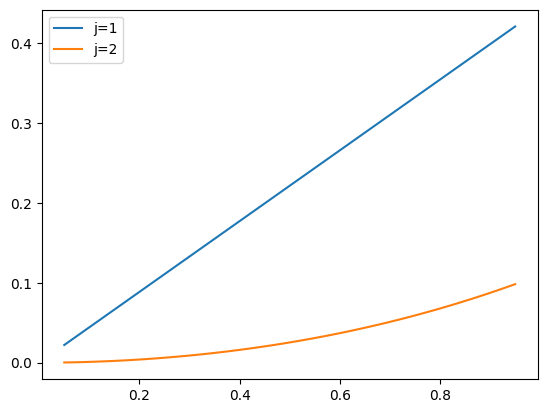

In [6]:
SOL=wave_base(Nc,H,0,fs) # spline start settles Fourier components versus h=H/Hmx
Ej(H,SOL)
plt.legend()
plt.show()

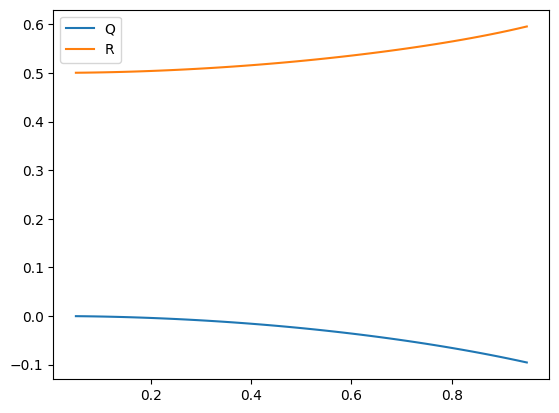

In [7]:
QR(H,SOL) # and Q,R
plt.legend()
plt.show()

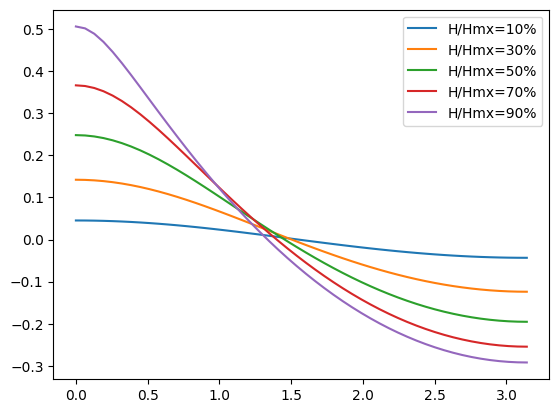

In [8]:
N=20
for h in np.linspace(0.1,0.9,5):
    A0=np.insert(fs(h),-2,np.zeros(N-Nc))
    sol=wave(N,h*Hmx_L(0)*2*np.pi,A0=A0)
    if not sol.success:
        print(h)
        print(sol.message)
        # continue    
    X=np.linspace(0,np.pi)
    eta(X,0,sol,f'H/Hmx={h:.0%}')
plt.legend()
plt.show()

In [9]:
from fenton.read_eta import get

def fenton_compare(L_d,NR):
    for n in NR:
        fenton=get(L_d,n)
        fH=fenton[0]['H']
        fN=fenton[1][-1]    
        h=fH/Hmx_0/2/np.pi
        cooke=wave(fN,fH,L_d,A0=fs(h))
        if not cooke.success:
            print(h,cooke.message)
        eta(X,0,cooke,f'cooke={h:.0%}')
        cooke.x=fenton[-1] # substitute Fenton result
        eta(X,0,cooke,f'fenton={h:.0%}')

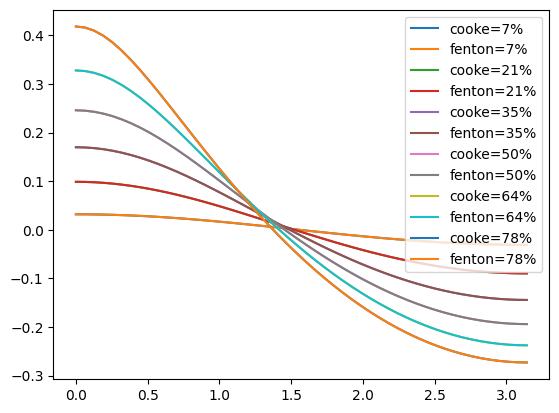

In [10]:
fenton_compare(L_d,range(1,13,2))
plt.legend()
plt.show()

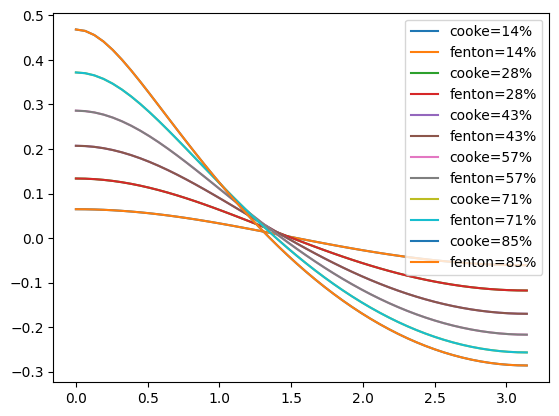

In [11]:
fenton_compare(L_d,range(2,13,2))
plt.legend()
plt.show()

True


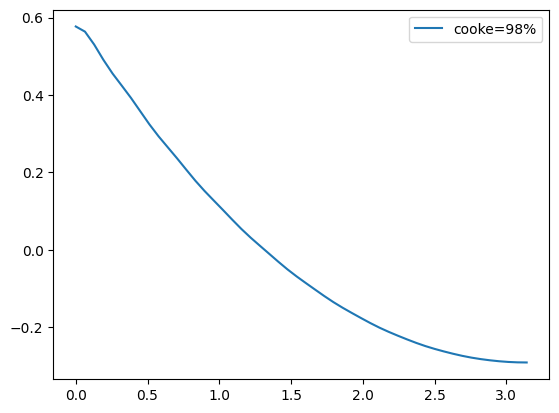

In [12]:
h=0.98
H=h*Hmx_L(0)*2*np.pi
N=20
cooke=wave(N,H,A0=fs(h))
eta(X,0,cooke,f'cooke={h:.0%}')
print(cooke.success)
plt.legend()
plt.show()